In [44]:
import pandas as pd
import numpy as np

In [45]:
def make_df_from_tournament(tournament_url, npages, string):
    
    ''' This function realizes a dataframe from a single tournament url that has many rounds in different pages 
        
        ETER_PARAMETERS:
        
            (string) tournament_url : url of the tournament in html or csv;
            
            (int) npages : number of pages the tournament has inside which there are all matches;
            
            (string) string : string added by default on tournament url in the searchbar by the browser when you change 
                              page to get other matches of the same tournament.
                              
        RETURNS:
            (pandas_object) df : pandas dataframe already concatenated.
            '''
    n_of_pages = np.arange(0, npages*100, 100) 
    # make sure the browser added 100 to the page number
    
    tournament_list = []
    for i in range(len(n_of_pages)):
        if i == 0:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url)[3]))
        else:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url + string + str(n_of_pages[i]))[1]))
    
    df = pd.concat(tournament_list)
    
    return df

list_of_data = ['https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856',
               'https://www.365chess.com/tournaments/30th_Cracovia_Open_A_2019/43861',
                'https://www.365chess.com/tournaments/World_Rapid_2019_2019/43853']
pages = [22, 3, 16]
strings ="/?p=1&start="
make_df_from_tournament('https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856', 22, "/?p=1&start=")


White          Black Result   Round          Date  \
0       Nakamura, H    Bosiocic, M    1-0   1.100  Dec 29, 2019   
1          Socko, B        Giri, A    ½-½   1.100  Dec 29, 2019   
2      Al Ghamdi, A  Utegaliyev, A    0-1   1.100  Dec 29, 2019   
3          Kezin, R     Masrahi, A    1-0   1.101  Dec 29, 2019   
4    Al Thebaiti, A  Alekseenko, K    0-1   1.102  Dec 29, 2019   
..              ...            ...    ...     ...           ...   
55          Tsoi, D     Mamatov, M    1-0  21.950  Dec 30, 2019   
56         Thing, B      Gukesh D,    0-1  21.960  Dec 30, 2019   
57       Potapov, P   Al Ghamdi, A    1-0  21.970  Dec 30, 2019   
58          Usov, A     Yagupov, I    0-1  21.980  Dec 30, 2019   
59  Miranda Neto, J    Pogosyan, S    0-1  21.990  Dec 30, 2019   

                                      Opening  View  
0                            A06 Reti opening   NaN  
1                          A56 Benoni defence   NaN  
2   B01 Scandinavian (centre counter) defence   NaN  
3                       A50 Queen's pawn game   NaN  
4                       A45 Queen's pawn game   NaN  
..                                        ...   ...  
55                         A03 Bird's opening   NaN  
56    B22 Sicilian, Alapin's variation (2.c3)   NaN  
57                    C55 Two knights defence   NaN  
58                       B40 Sicilian defence   NaN  
59                          A81 Dutch defence   NaN  

[2160 rows x 7 columns]

In [54]:
def reading(list_of_t, npages, string_variable):
    for i in range(len(list_of_t)):
        df = make_df_from_tournament(list_of_t[i], npages[i], strings)
        if i==0:
            df_fin = df
        else:
            df_fin=pd.concat([df_fin,df])
    return df_fin

list_of_data = ['https://www.365chess.com/tournaments/World_Blitz_2019_2019/43856',
               'https://www.365chess.com/tournaments/30th_Cracovia_Open_A_2019/43861',
                'https://www.365chess.com/tournaments/World_Rapid_2019_2019/43853']
pages = [22, 3, 16]
strings ="/?p=1&start="
dataframe_all = reading(list_of_data, pages, strings)

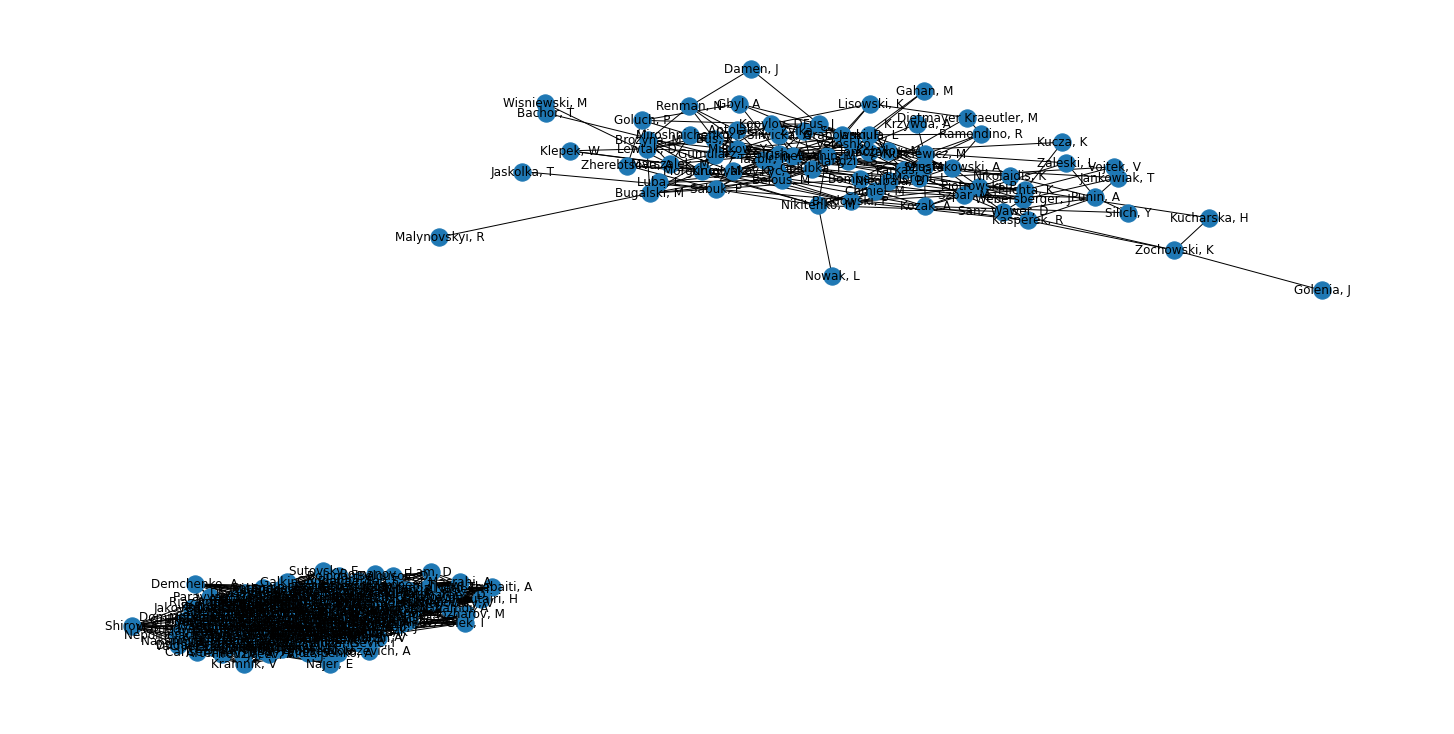

In [60]:
A = nx.from_pandas_edgelist(dataframe_all, source='White', target='Black')
plt.figure(figsize=(20,10))
nx.draw(A, with_labels=True)

In [31]:
df.drop('View', axis=1)

White          Black Result   Round          Date  \
0       Nakamura, H    Bosiocic, M    1-0   1.100  Dec 29, 2019   
1          Socko, B        Giri, A    ½-½   1.100  Dec 29, 2019   
2      Al Ghamdi, A  Utegaliyev, A    0-1   1.100  Dec 29, 2019   
3          Kezin, R     Masrahi, A    1-0   1.101  Dec 29, 2019   
4    Al Thebaiti, A  Alekseenko, K    0-1   1.102  Dec 29, 2019   
..              ...            ...    ...     ...           ...   
55          Tsoi, D     Mamatov, M    1-0  21.950  Dec 30, 2019   
56         Thing, B      Gukesh D,    0-1  21.960  Dec 30, 2019   
57       Potapov, P   Al Ghamdi, A    1-0  21.970  Dec 30, 2019   
58          Usov, A     Yagupov, I    0-1  21.980  Dec 30, 2019   
59  Miranda Neto, J    Pogosyan, S    0-1  21.990  Dec 30, 2019   

                                      Opening  
0                            A06 Reti opening  
1                          A56 Benoni defence  
2   B01 Scandinavian (centre counter) defence  
3                       A50 Queen's pawn game  
4                       A45 Queen's pawn game  
..                                        ...  
55                         A03 Bird's opening  
56    B22 Sicilian, Alapin's variation (2.c3)  
57                    C55 Two knights defence  
58                       B40 Sicilian defence  
59                          A81 Dutch defence  

[2160 rows x 6 columns]

In [6]:
# How to find items

def how_find(df_colum, name):
    i=df[df[df_colum]==name]
    return i 

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rank = pd.DataFrame(pd.read_excel(r"C:\Users\checc\OneDrive\Desktop\classifica.xlsx"))
rank

Player   ELO   Pts
0            GM Carlsen, Magnus  2872  16.5
1           GM Nakamura, Hikaru  2736  16.5
2          GM Kramnik, Vladimir  2753  15.0
3    GM Vachier Lagrave, Maxime  2780  14.0
4            GM Matlakov, Maxim  2699  14.0
..                          ...   ...   ...
201  Miranda Neto, Jaime Amorim  2102   4.0
202   CM Masrahi, Abdulrahman A  1956   4.0
203         FM Al Nhier, Hamoud  1934   4.0
204     CM Al Thebaiti, Ahmed M  1976   3.5
205     CM Al Mutairi, Hassan S  1883   3.5

[206 rows x 3 columns]

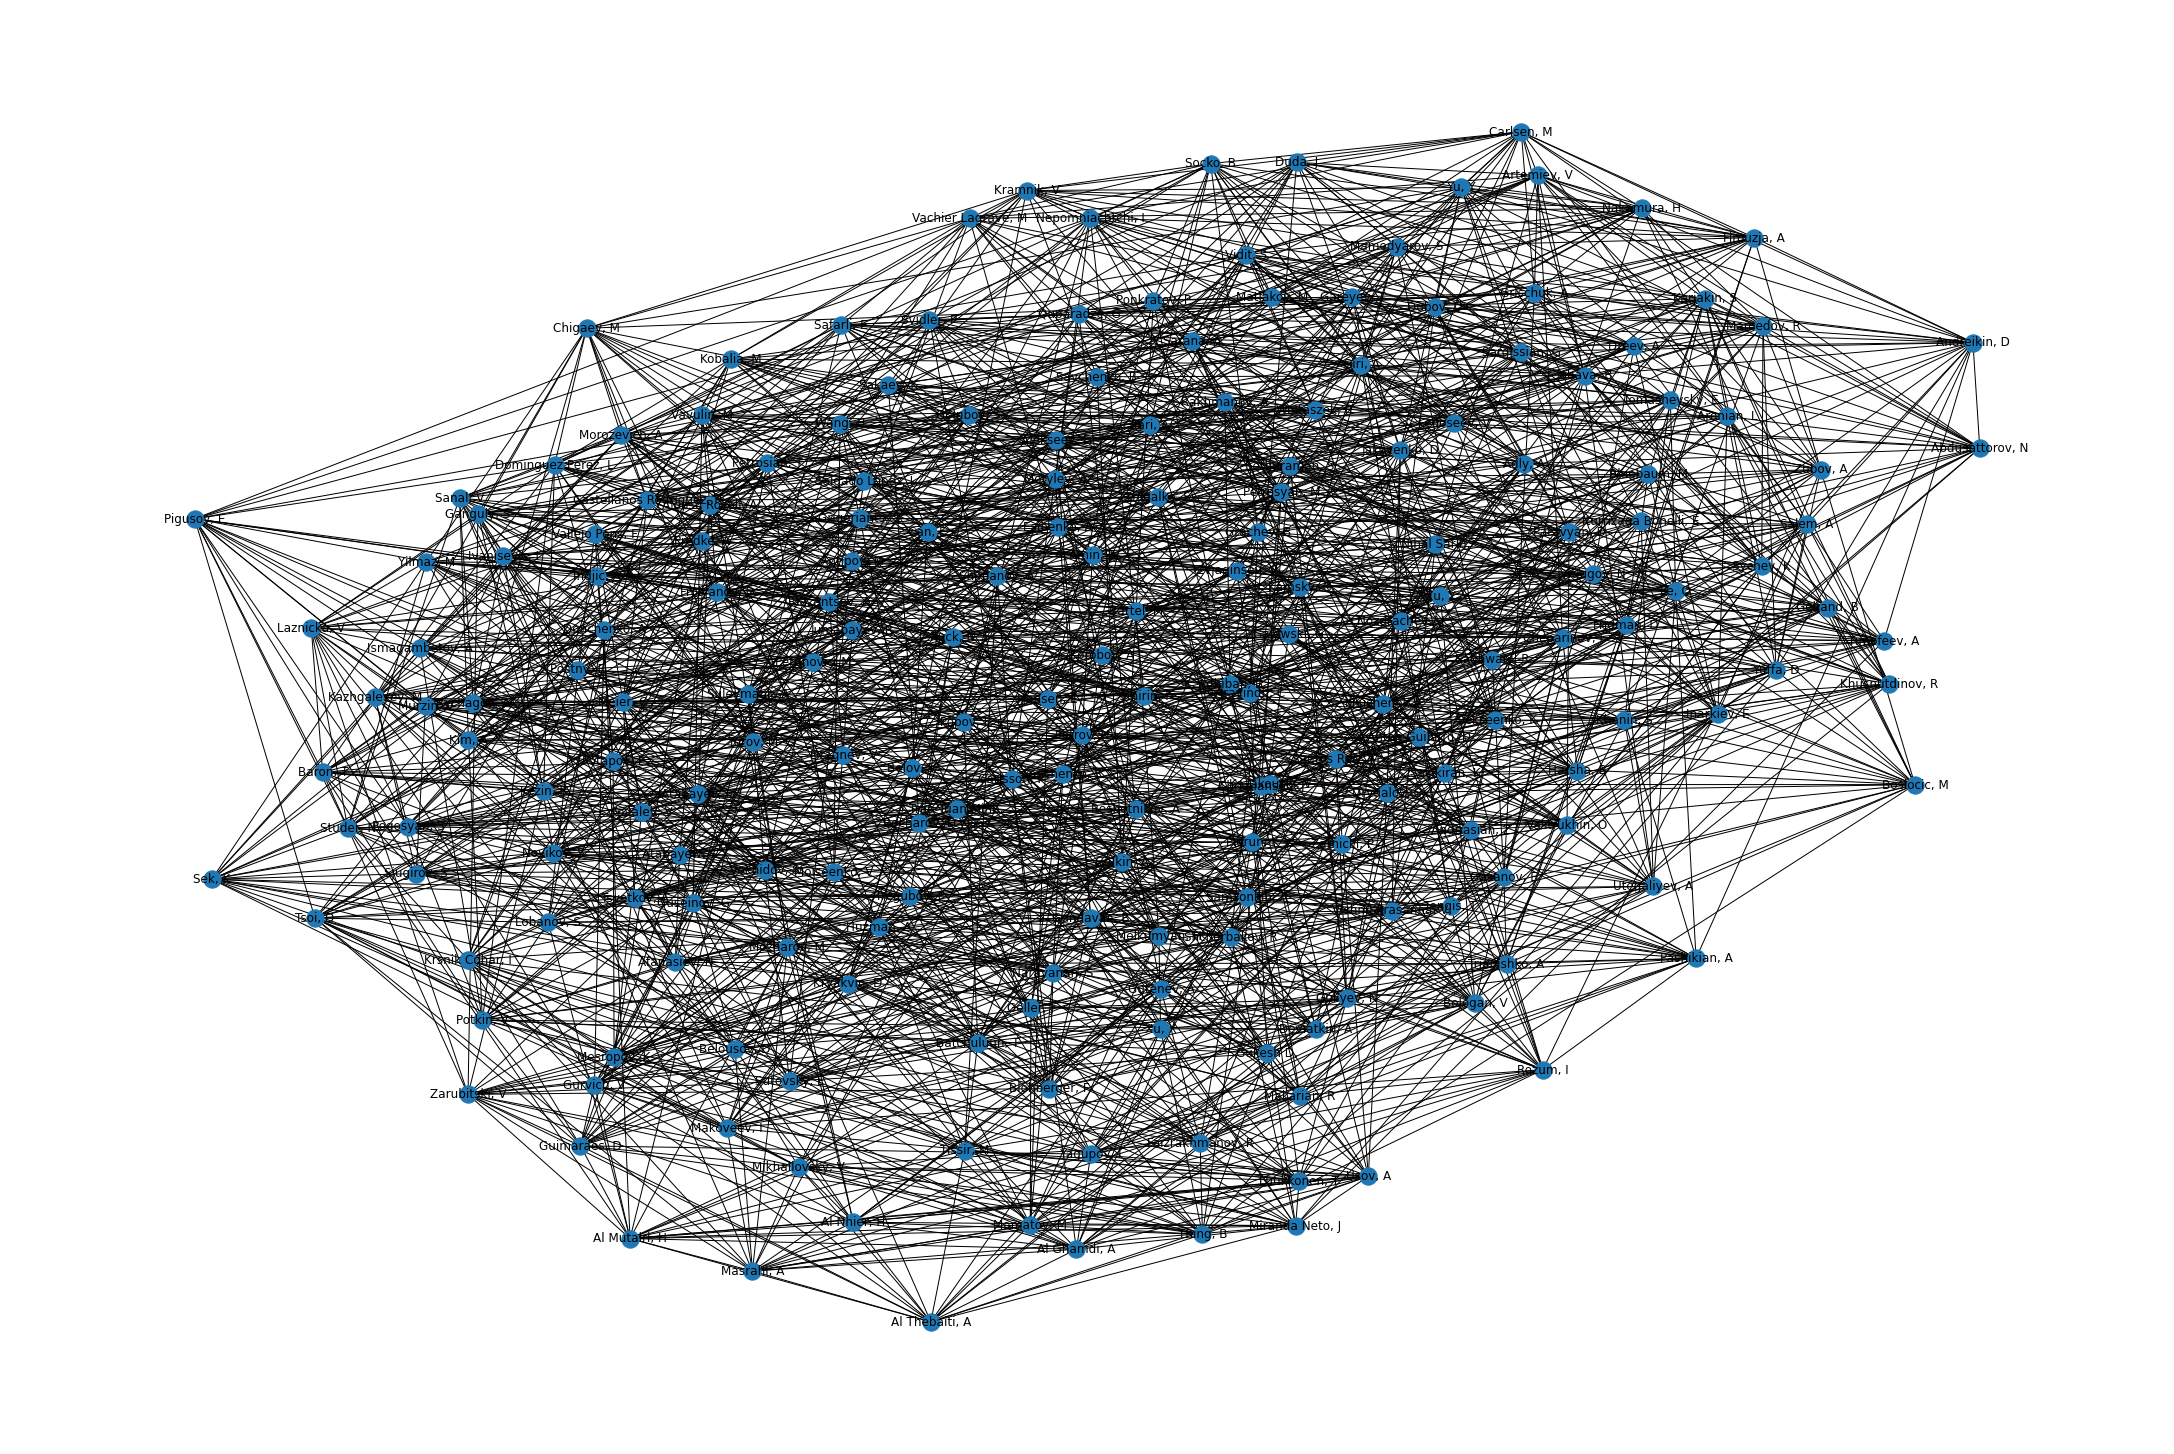

In [9]:
G = nx.from_pandas_edgelist(df, source='White', target='Black')
fig = plt.figure(figsize=(30,20))
nx.draw(G, with_labels=True)

C:\Users\checc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


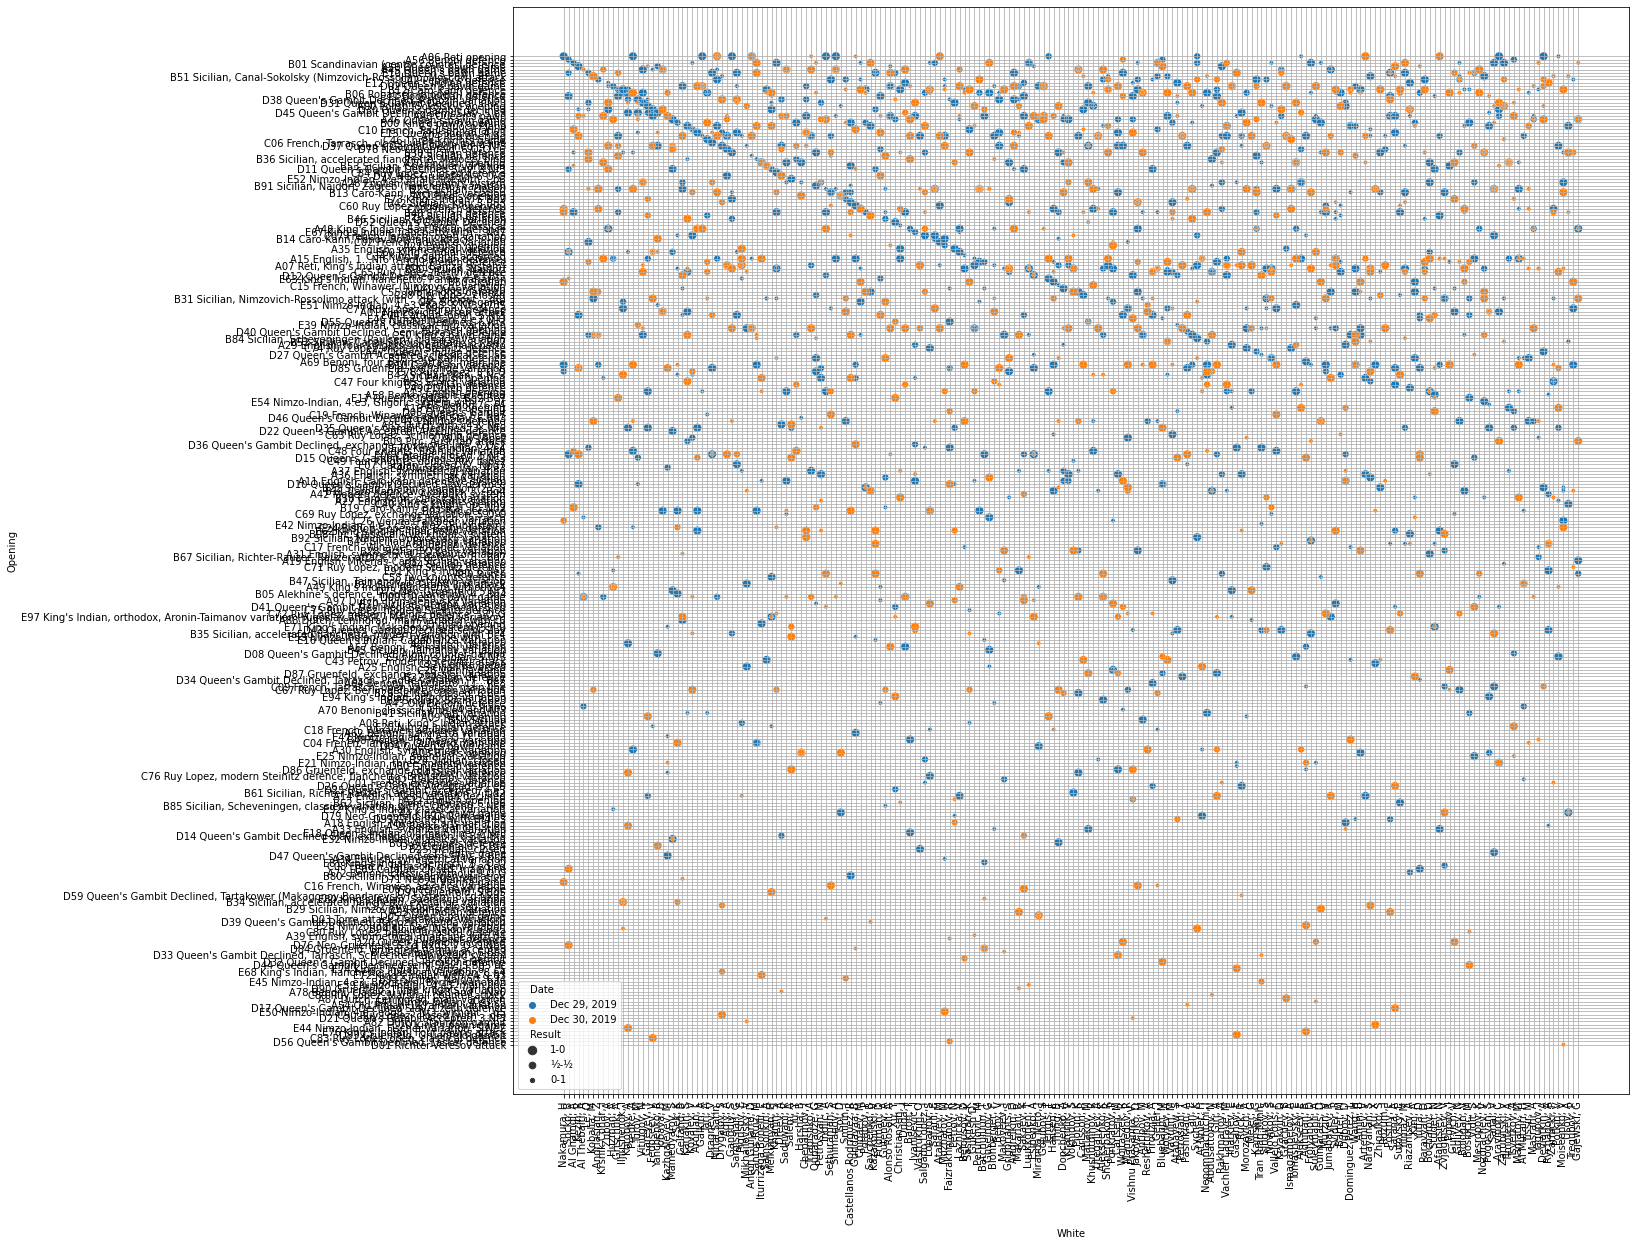

In [33]:
import seaborn as sns
 
plt.figure(figsize=(20,20))
Openings = df.Opening
sns.scatterplot(df.White, df.Opening, hue=df.Date, size=df.Result)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [11]:
import collections

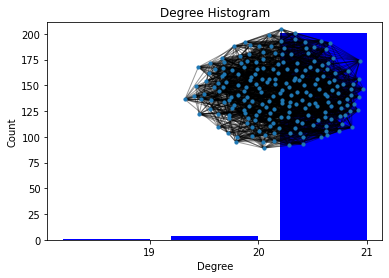

In [12]:
degree_seq = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.4)

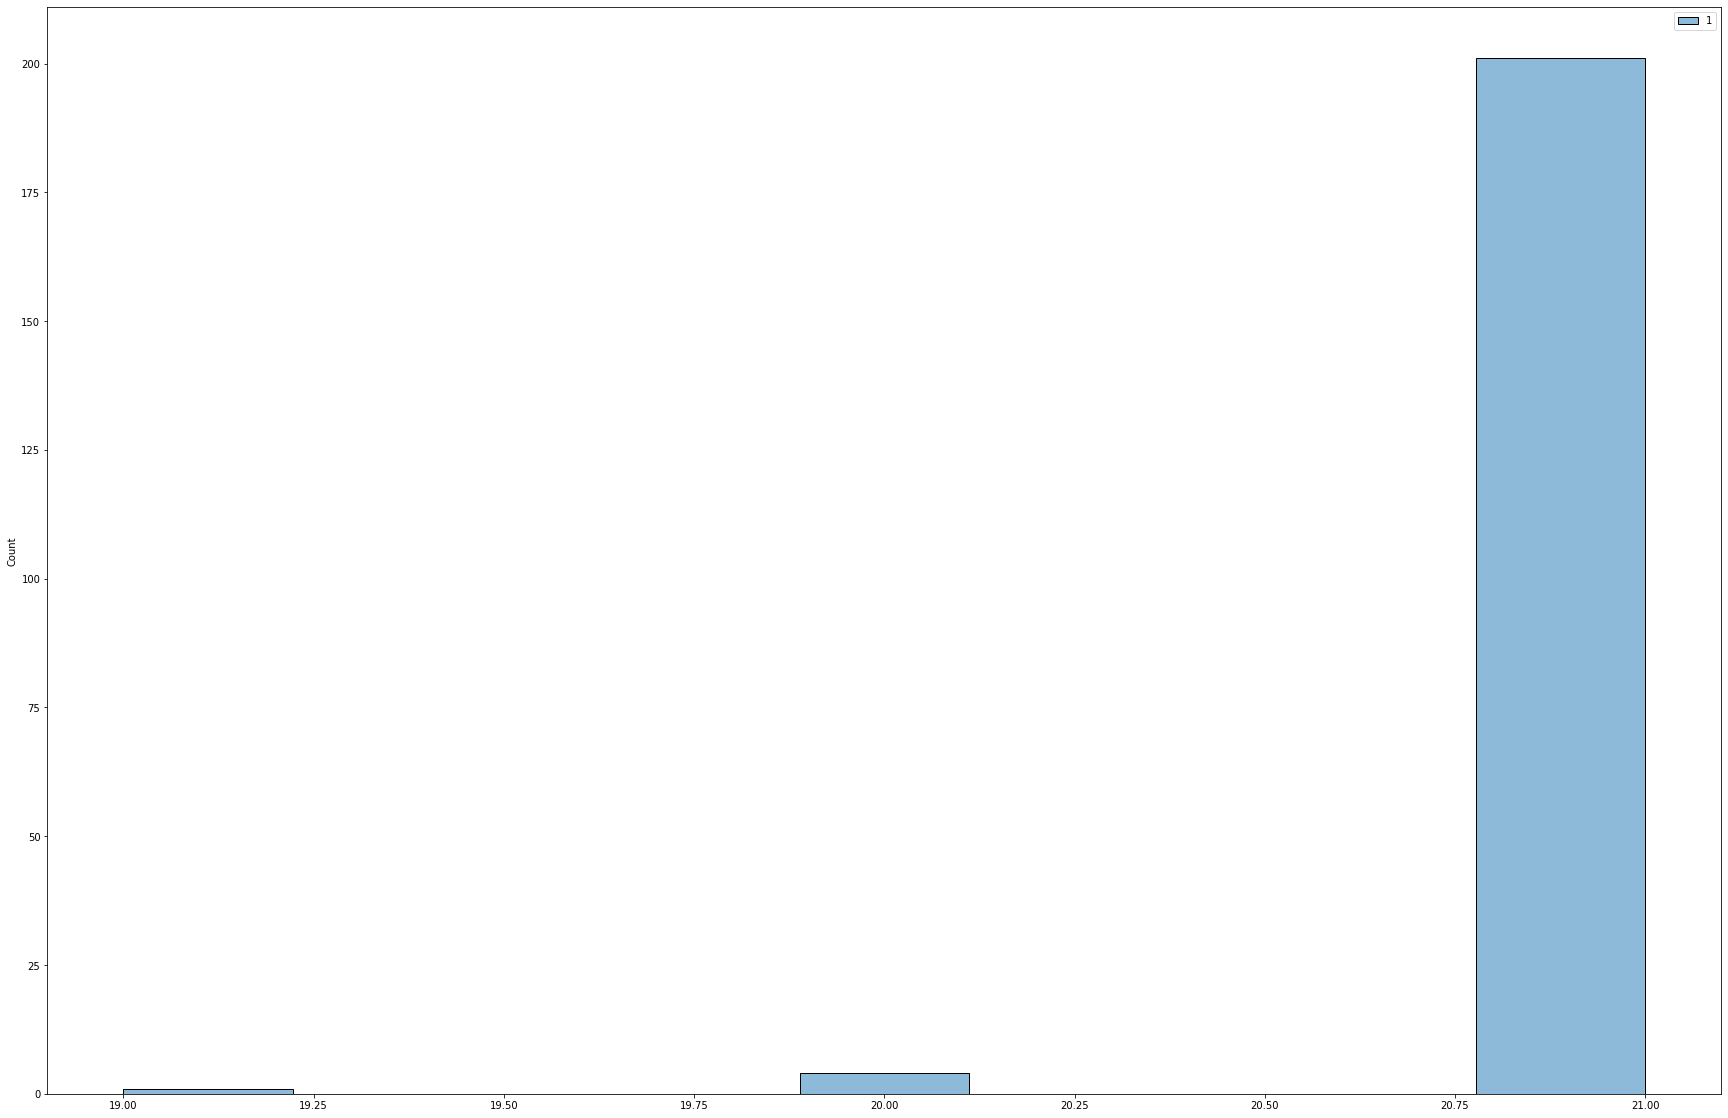

In [42]:
plt.figure(figsize=(30,20))
degree = sns.histplot(G.degree())

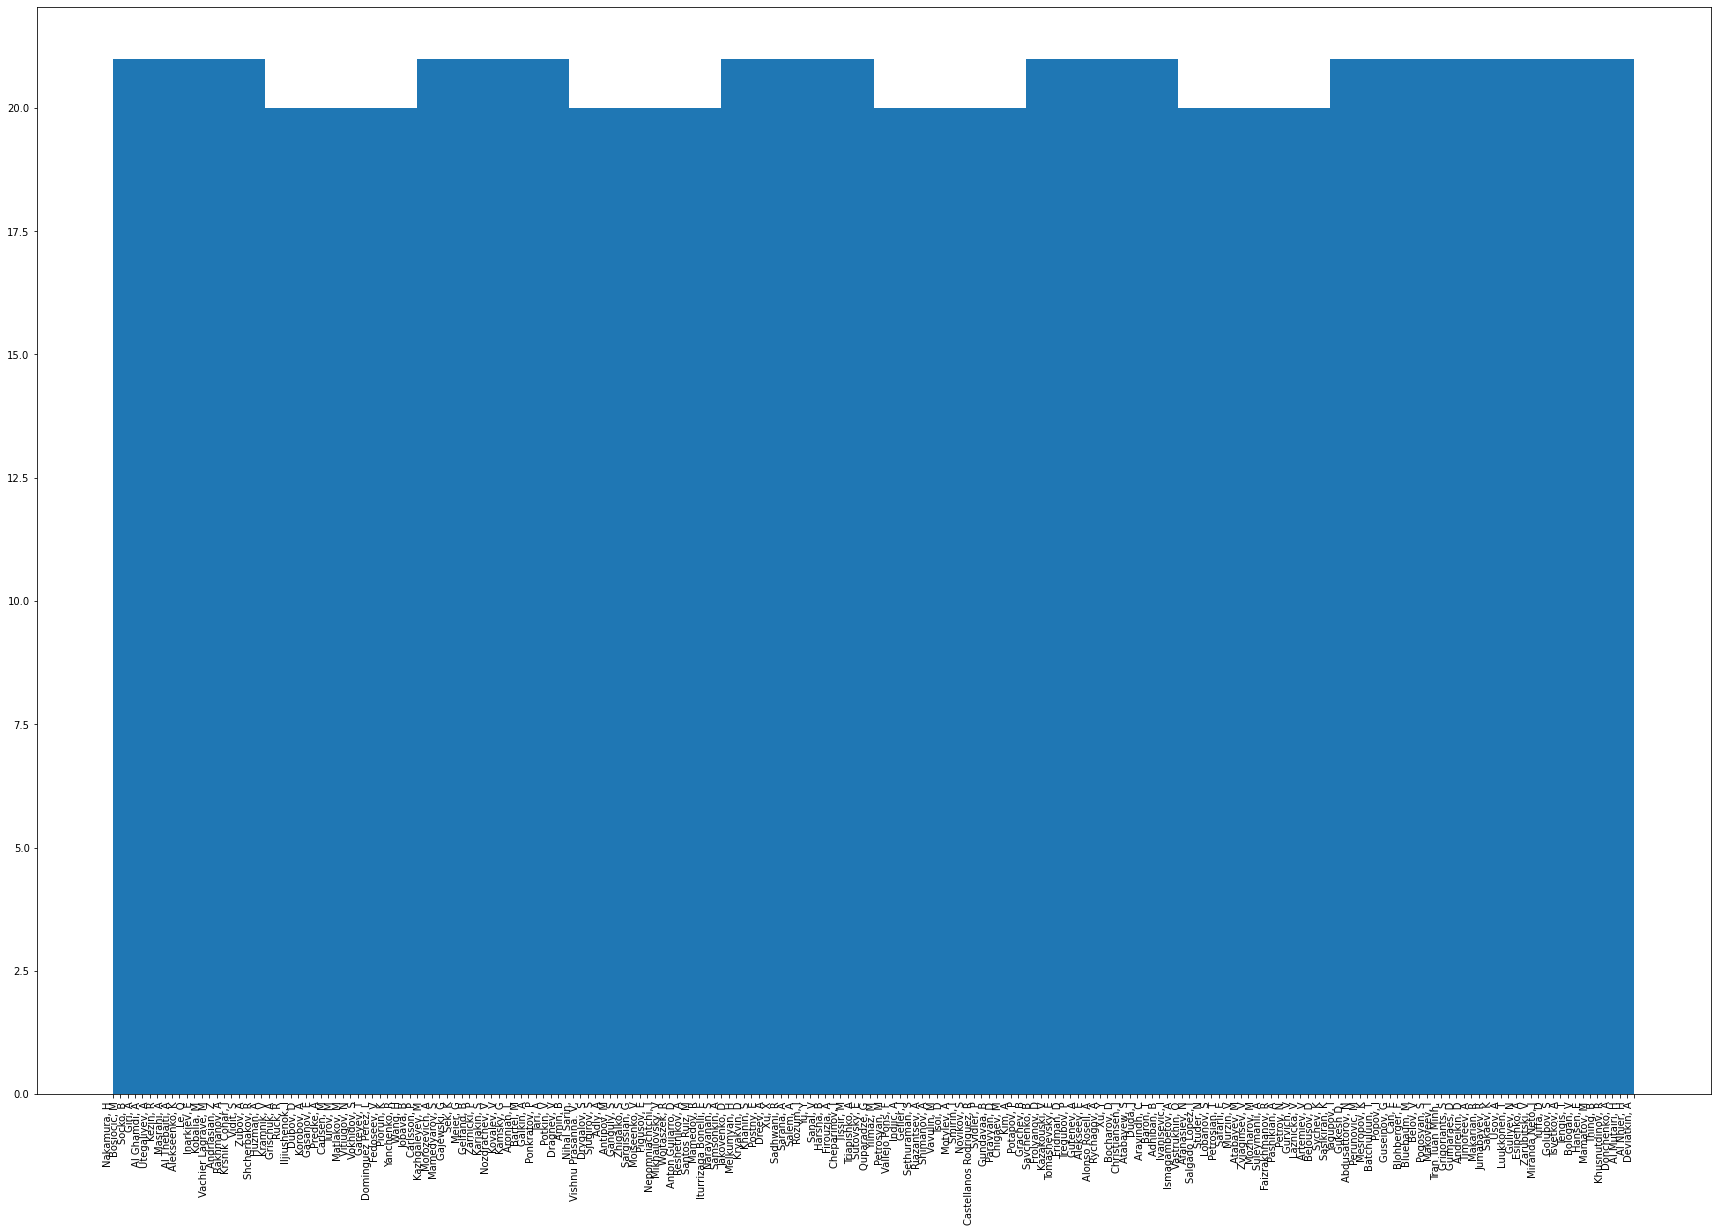

In [35]:
betweenness = nx.betweenness_centrality(G)
plt.figure(figsize=(30,20))
plt.hist(betweenness)
plt.xticks(rotation=90, ha='right')
plt.show()

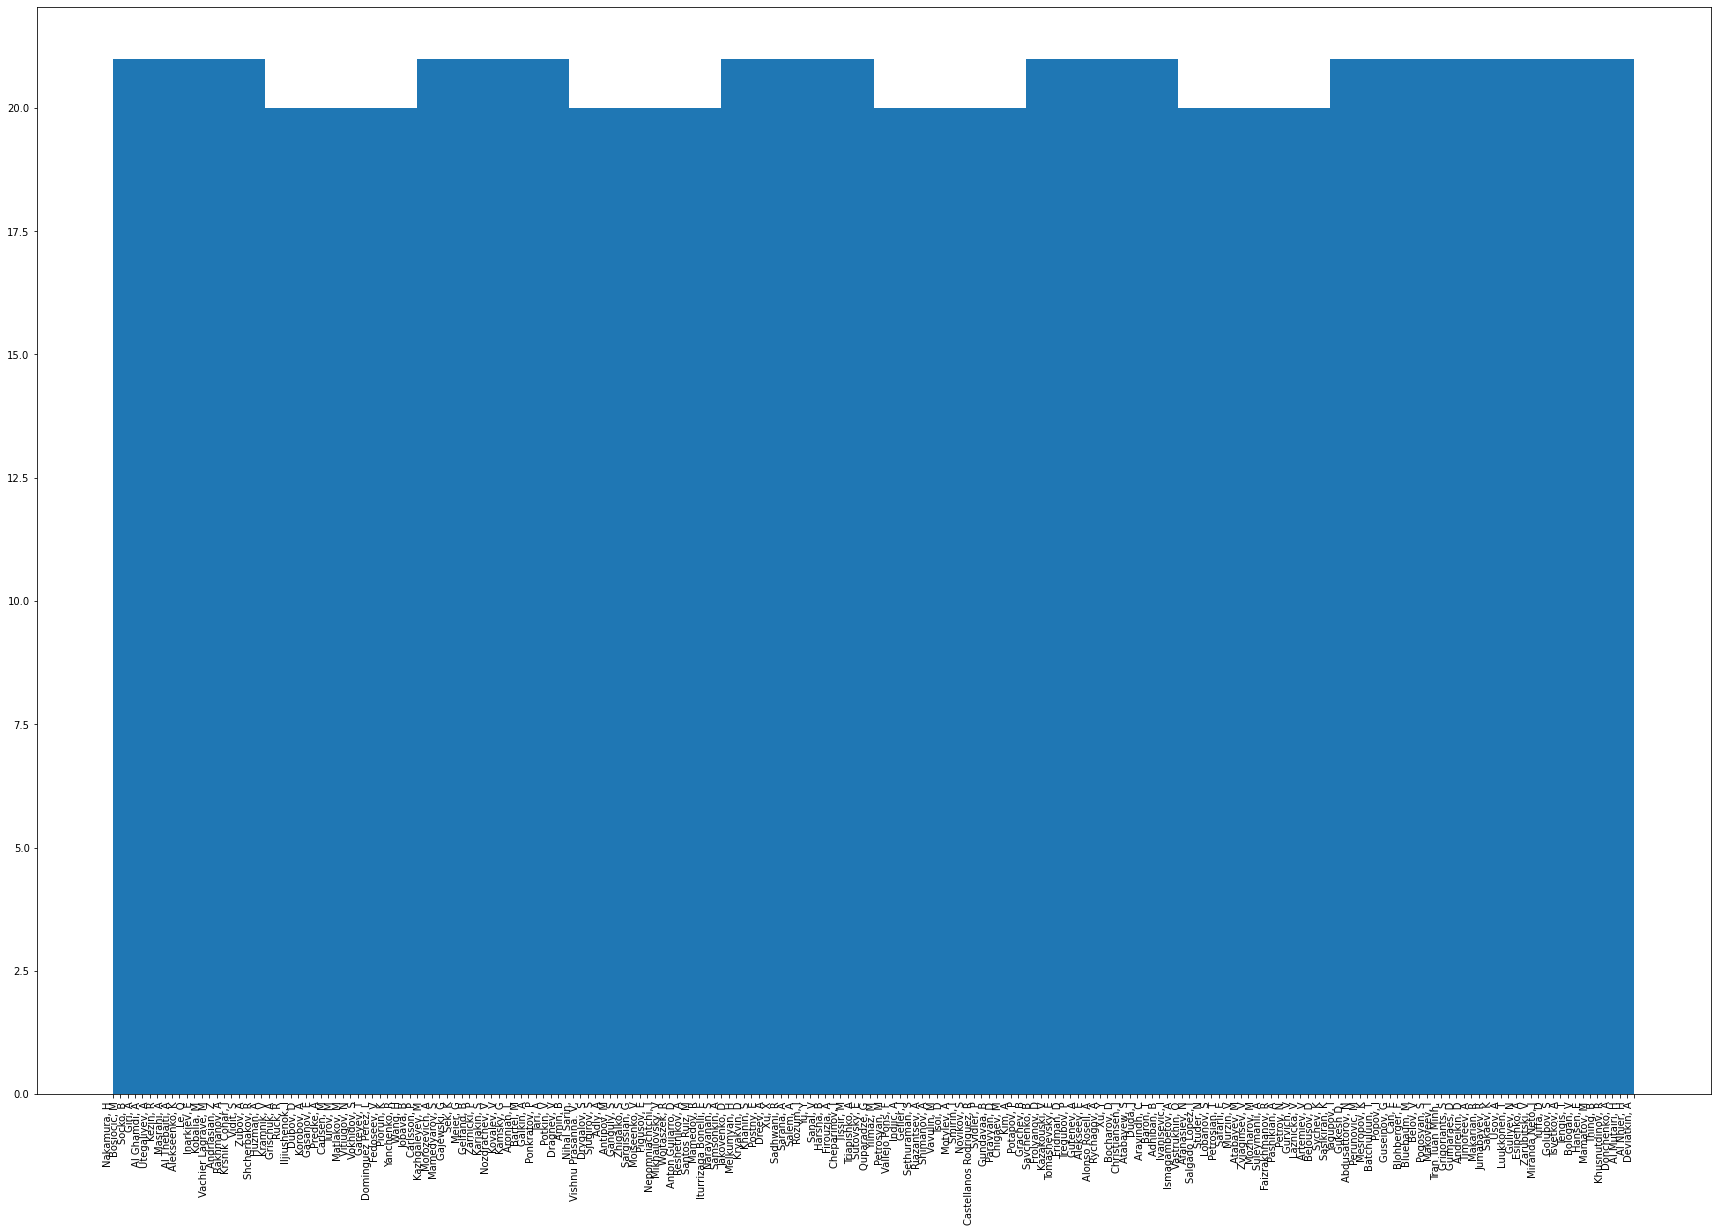

In [34]:
closeness = nx.closeness_centrality(G)
plt.figure(figsize=(30,20))
plt.hist(closeness)
plt.xticks(rotation=90, ha='right')
plt.show()

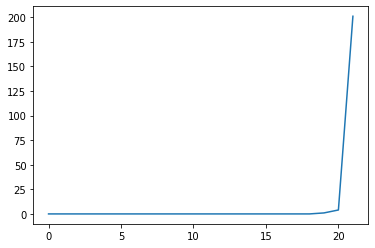

In [38]:
degree = nx.degree_histogram(G)
degree
plt.plot(degree)

<AxesSubplot:ylabel='Count'>

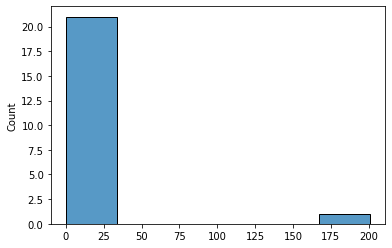

In [40]:
sns.histplot(degree)

In [17]:
degree_hist = nx.degree(G)
degree_hist

DegreeView({'Nakamura, H': 21, 'Bosiocic, M': 21, 'Socko, B': 21, 'Giri, A': 21, 'Al Ghamdi, A': 21, 'Utegaliyev, A': 21, 'Kezin, R': 21, 'Masrahi, A': 21, 'Al Thebaiti, A': 19, 'Alekseenko, K': 21, 'Le, Q': 21, 'Inarkiev, E': 21, 'Kobalia, M': 21, 'Vachier Lagrave, M': 21, 'Andriasian, Z': 21, 'Rakhmanov, A': 21, 'Krsnik Cohar, I': 21, 'Vidit, S': 21, 'Zubov, A': 21, 'Shcherbakov, R': 21, 'Huzman, A': 21, 'Kramnik, V': 21, 'Grischuk, A': 21, 'Ruck, R': 21, 'Iljiushenok, I': 21, 'Dubov, D': 21, 'Korobov, A': 21, 'Gasanov, E': 21, 'Predke, A': 21, 'Carlsen, M': 21, 'Turov, M': 21, 'Matlakov, M': 21, 'Vitiugov, N': 21, 'Vokhidov, S': 21, 'Gareyev, T': 21, 'Dominguez Perez, L': 21, 'Fedoseev, V': 21, 'Piorun, K': 21, 'Yanchenko, R': 21, 'Wang, H': 21, 'Jobava, B': 21, 'Carlsson, P': 21, 'Kazhgaleyev, M': 21, 'Morozevich, A': 21, 'Mamedyarov, S': 21, 'Gajewski, G': 20, 'Sek, K': 21, 'Meier, G': 21, 'Gelfand, B': 21, 'Zarnicki, P': 21, 'Karjakin, S': 21, 'Nozdrachev, V': 21, 'Kovalev, V': 2

In [18]:
char = {'diameter': nx.diameter(G),
       'density': nx.density(G)}
char

{'diameter': 3, 'density': 0.10229694529955008}

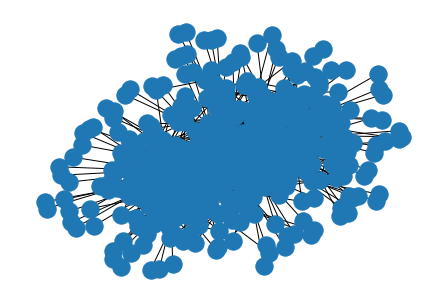

In [49]:
from networkx.algorithms import bipartite
B = nx.Graph()

B.add_nodes_from(df['White'], bipartite=0)
B.add_nodes_from(df['Opening'], bipartite=1)
B.add_weighted_edges_from(
    [(row['White'], row['Opening'], 1) for idx, row in df.iterrows()], 
    weight='Result')
nx.draw(B)